In [1]:
#Load libraries 
import sspa
import networkx as nx
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Check sample overlap between datasets

In [ ]:
df = pd.read_csv('Data/Su_COVID_metabolomics_processed_ChEBI.csv', index_col=0)
df2 = pd.read_csv('Data/Su_COVID_proteomics_processed.csv', index_col=0)

In [ ]:
df.index= df.index.str.rstrip('-BL')  #remove 'BL' label from the cases (so I can match to proteomic data)

In [ ]:
def sample_overlap(status):
    list1 = list(df[df['WHO_status']== status].index)
    list2 = list(df2[df2['WHO_status']== status].index)
    #print(list1)
    #print(list2)
    intersection = list(set(list1).intersection(list(set(list2))))  #set removes duplicates
    print(status, "      Common samples:",len(intersection),"         Metabolomic samples:",len(list1),"       Proteomic samples:",len(list2))
    #print(set(list1) - set(list2),set(list2) - set(list1))   #Different samples between the two

sample_overlap('0')
sample_overlap('1-2')
sample_overlap('3-4')
sample_overlap('5-7')

#print(df['WHO_status'].value_counts()) 

In [ ]:
df = pd.read_csv('Data/Su_COVID_metabolomics_processed_ChEBI.csv', index_col=0)
df2 = pd.read_csv('Data/Su_COVID_proteomics_processed.csv', index_col=0)

df.index= df.index.str.rstrip('-BL')  #remove 'BL' label from the cases (so I can match to proteomic data)

list1 = list(df.index)
list2 = list(df2.index)
#print(list1)
#print(list2)
intersection = list(set(list1).intersection(list(set(list2))))  #set removes duplicates

print(len(intersection))

### Obtaining pathway names for the graph

In [ ]:
#Load dataset
metabolomic = nx.read_gml("Cytoscape/metabolomic_prefiltered.gml")
proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered.gml")


In [2]:
#Load dataset
#This is when the pathway scores are calculated subset to the 128 SAMPLES common to both datasets
metabolomic = nx.read_gml("Cytoscape/metabolomic_prefiltered_commoncases.gml")
proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered_commoncases.gml")

#metabolomic = nx.read_gml("Cytoscape/metabolomic_prefiltered_mildcases.gml")
#proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered_mildcases.gml")

#metabolomic = nx.read_gml("Cytoscape/metabolomic_prefiltered_severecases.gml")
#proteomic = nx.read_gml("Cytoscape/proteomic_prefiltered_severecases.gml")

In [4]:
print(proteomic.number_of_nodes())
print(proteomic.number_of_edges())

print(metabolomic.number_of_nodes())
print(metabolomic.number_of_edges())

#Pathways in common
common_nodes = list(set(proteomic.nodes).intersection(list(set(metabolomic.nodes))))
len(common_nodes)

578
166753
144
10296


47

In [5]:
#Filter out pathways that are not present in both omic sets

proteomic_copy =  proteomic.copy()
for n in list(proteomic.nodes()):
    if n not in common_nodes:
        proteomic_copy.remove_node(n)

metabolomic_copy =  metabolomic.copy()
for n in list(metabolomic.nodes()):
    if n not in common_nodes:
        metabolomic_copy.remove_node(n)



### Plot the parameter values for both omics datasets 

In [5]:
def find_val(list1,list2,value):
    for node1, node2, data in proteomic_copy.edges(data=True):
        list1.append(data[value])
    for node1, node2, data in metabolomic_copy.edges(data=True):
        list2.append(data[value])


Comparing the Spearman p-values of the two omics:

In [ ]:
proteomic_pval = []
metabolomic_pval = []

find_val(proteomic_pval,metabolomic_pval,'Spearman_pval')

#It's not possible to take the log10 of zero, we ignore the divide by zero warning
#Transform the p-values on a -log10 scale
#Any infinite values after the log-transform were originally zeroes

np.seterr(divide = 'ignore')    

log_proteomic_pval = -np.log10(proteomic_pval)
log_metabolomic_pval = -np.log10(metabolomic_pval)

np.seterr(divide = 'warn') 
    

In [ ]:
print(np.median(proteomic_pval))
print(np.median(metabolomic_pval))

print(np.mean(proteomic_pval))
print(np.mean(metabolomic_pval))

print(sum(i == 1  for i in metabolomic_pval))

In [ ]:
sns.scatterplot(x=log_proteomic_pval, y=log_metabolomic_pval,s=8)       #color='#FFD580',s=10
                
plt.title('Comparison of Spearman correlation p-values',fontsize=16)
plt.xlabel("Proteomic Spearman p-values (-log10)",fontsize=13, labelpad=5)
plt.ylabel("Metabolomic Spearman p-values (-log10)",fontsize=13, labelpad=10) 

#Changing the axis limits to focus on the significant area only
#plt.xlim(-np.log10(0.005),)   #-log_10(0.005) = 2.301...
#plt.ylim(-np.log10(0.005),)

#plt.savefig('Figures/omics_Spearman_pval.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

Comparing the Spearman correlation coefficients of the two omics:

Text(0, 0.5, 'Metabolomic Spearman correlation')

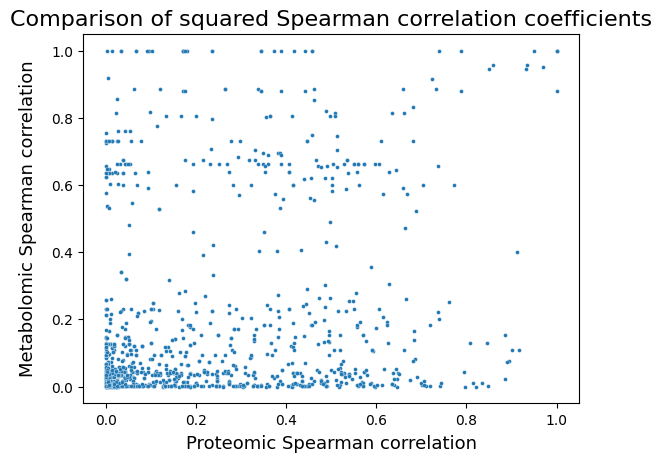

In [6]:
proteomic_corr = []
metabolomic_corr = []
find_val(proteomic_corr,metabolomic_corr,'Squared_corr')


sns.scatterplot(x=proteomic_corr, y=metabolomic_corr,s=8)       #color='#FFD580',s=10
                
plt.title('Comparison of squared Spearman correlation coefficients',fontsize=16)
plt.xlabel("Proteomic Spearman correlation",fontsize=13, labelpad=5)
plt.ylabel("Metabolomic Spearman correlation",fontsize=13, labelpad=10) 

#plt.savefig('Figures/omics_spearman_corr.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [7]:
print(np.median(proteomic_corr))
print(np.median(metabolomic_corr))

print(np.mean(proteomic_corr))
print(np.mean(metabolomic_corr))

0.16008332892033378
0.050121030262299505
0.2359807450923317
0.19988216270058742


Highlight edges which are significant in Spearman correlation scatterplot:

In [ ]:
proteomic_copy.edges(data=True)

In [8]:
proteomic_pval = []
metabolomic_pval = []
find_val(proteomic_pval,metabolomic_pval,'Spearman_pval')

proteomic_oc = []
metabolomic_oc = []
find_val(proteomic_oc,metabolomic_oc,'Overlap_coef')

In [9]:
omics_corr_df = pd.DataFrame(
    {'Proteomic_corr': proteomic_corr,
     'Metabolomic_corr': metabolomic_corr,
     'Proteomic_pval': proteomic_pval,
     'Metabolomic_pval': metabolomic_pval,
     'Proteomic_overlap': proteomic_oc,
     "Metabolomic_overlap": metabolomic_oc
    })

In [10]:
omics_corr_df.iloc[-10:,:]
omics_corr_df["Sig"] = np.nan
omics_corr_df["Overlap"] = np.nan
omics_corr_df


,Proteomic_corr,Metabolomic_corr,Proteomic_pval,Metabolomic_pval,Proteomic_overlap,Metabolomic_overlap,Sig,Overlap
0,0.412599,0.002839,5.050947e-11,1.000000e+00,0.000000,0.0,NaN,NaN
1,0.593138,0.105508,3.795657e-21,1.000000e+00,0.000000,0.2,NaN,NaN
2,0.579110,0.035697,3.249235e-20,1.000000e+00,0.333333,0.0,NaN,NaN
3,0.001678,0.088620,1.000000e+00,1.000000e+00,0.000000,0.0,NaN,NaN
4,0.323176,0.600786,4.279399e-07,7.045438e-23,0.333333,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...
1076,0.236388,1.000000,9.926178e-04,0.000000e+00,1.000000,1.0,NaN,NaN
1077,0.343989,1.000000,5.805787e-08,0.000000e+00,0.000000,1.0,NaN,NaN
1078,0.236388,1.000000,9.926178e-04,0.000000e+00,1.000000,1.0,NaN,NaN
1079,0.343989,1.000000,5.805787e-08,0.000000e+00,0.000000,1.0,NaN,NaN


In [11]:
for i in range(len(omics_corr_df)):
    if ((omics_corr_df.Proteomic_pval[i]) >= 0.005) and ((omics_corr_df.Metabolomic_pval[i]) < 0.005):
        omics_corr_df.Sig[i] = "Proteomic insignificant"
    elif ((omics_corr_df.Proteomic_pval[i]) < 0.005) and ((omics_corr_df.Metabolomic_pval[i]) >= 0.005):
        omics_corr_df.Sig[i] = "Metabolomic insignificant"
    elif ((omics_corr_df.Proteomic_pval[i]) >= 0.005) and ((omics_corr_df.Metabolomic_pval[i]) >= 0.005):
        omics_corr_df.Sig[i] = "Both insignificant"
    else:
        omics_corr_df.Sig[i] = "Significant"
        
display(omics_corr_df)


print(omics_corr_df.Sig.str.count("Significant").sum())

print(len(omics_corr_df[omics_corr_df['Metabolomic_corr'] == 0.9999999999999996]))  #31 out of 1,081 edges, 0.9999999999999996 for all cases, 1 for common cases subset
omics_corr_df['Metabolomic_corr'][1080]

,Proteomic_corr,Metabolomic_corr,Proteomic_pval,Metabolomic_pval,Proteomic_overlap,Metabolomic_overlap,Sig,Overlap
0,0.412599,0.002839,5.050947e-11,1.000000e+00,0.000000,0.0,Metabolomic insignificant,NaN
1,0.593138,0.105508,3.795657e-21,1.000000e+00,0.000000,0.2,Metabolomic insignificant,NaN
2,0.579110,0.035697,3.249235e-20,1.000000e+00,0.333333,0.0,Metabolomic insignificant,NaN
3,0.001678,0.088620,1.000000e+00,1.000000e+00,0.000000,0.0,Both insignificant,NaN
4,0.323176,0.600786,4.279399e-07,7.045438e-23,0.333333,0.5,Significant,NaN
...,...,...,...,...,...,...,...,...
1076,0.236388,1.000000,9.926178e-04,0.000000e+00,1.000000,1.0,Significant,NaN
1077,0.343989,1.000000,5.805787e-08,0.000000e+00,0.000000,1.0,Significant,NaN
1078,0.236388,1.000000,9.926178e-04,0.000000e+00,1.000000,1.0,Significant,NaN
1079,0.343989,1.000000,5.805787e-08,0.000000e+00,0.000000,1.0,Significant,NaN


187
0


1.0

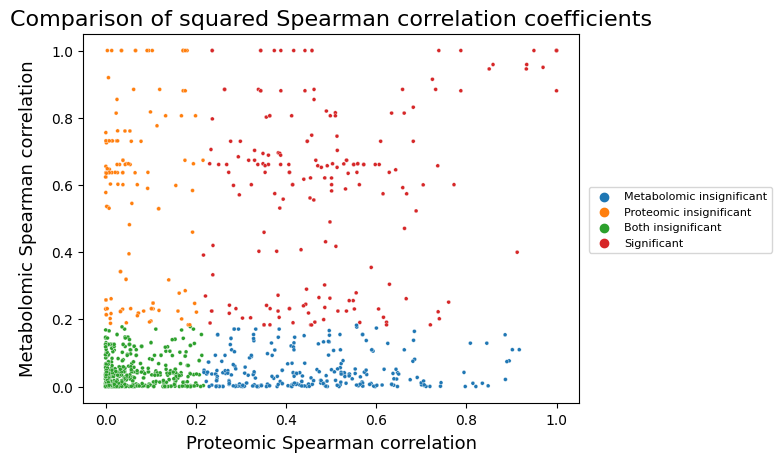

In [12]:
fig, ax = plt.subplots()  #i do this because ax.legend is needed to remove the legend title

sns.scatterplot(
    data=omics_corr_df,
    x="Proteomic_corr", 
    y="Metabolomic_corr",
    hue="Sig",
    hue_order = ['Metabolomic insignificant','Proteomic insignificant','Both insignificant','Significant'],
    #alpha=0.5,
    s=8)       #color='#FFD580',s=10
        
plt.title('Comparison of squared Spearman correlation coefficients',fontsize=16)
plt.xlabel("Proteomic Spearman correlation",fontsize=13, labelpad=5)
plt.ylabel("Metabolomic Spearman correlation",fontsize=13, labelpad=10) 

legend = ax.legend(bbox_to_anchor=(1.4,0.6), prop={'size': 8})
#plt.legend(framealpha=1, frameon = 'True', title="p-value",title_fontsize='large', prop={'size': 10}, bbox_to_anchor=(1.35, 0.7)) 

#plt.savefig('Figures/ALL_omics_spearman_corr_sigedges.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [13]:

for i in range(len(omics_corr_df)):
    if ((omics_corr_df.Proteomic_overlap[i]) < 0.5) and ((omics_corr_df.Metabolomic_overlap[i]) < 0.5):
        omics_corr_df.Overlap[i] = "Low overlap < 0.5"
    elif ((omics_corr_df.Proteomic_overlap[i]) >= 0.5) and ((omics_corr_df.Metabolomic_overlap[i]) < 0.5):
        omics_corr_df.Overlap[i] = "Proteomic overlap"
    elif ((omics_corr_df.Proteomic_overlap[i]) < 0.5) and ((omics_corr_df.Metabolomic_overlap[i]) >= 0.5):
        omics_corr_df.Overlap[i] = "Metabolomic overlap"
    elif ((omics_corr_df.Proteomic_overlap[i]) >= 0.5) and ((omics_corr_df.Metabolomic_overlap[i]) >= 0.5):
        omics_corr_df.Overlap[i] = "Overlap for both"


display(omics_corr_df)


print(omics_corr_df.Overlap.str.count("Low overlap < 0.5").sum()) #766 out of 1,081 edges (same for whole dataset and also when subset to common cases)
print(len(omics_corr_df[omics_corr_df['Metabolomic_overlap'] == 0]))  #597 out of 1,081 edges (same for whole dataset and also when subset to common cases)

C:\Users\jenna\AppData\Local\Temp\ipykernel_15684\907364467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omics_corr_df.Overlap[i] = "Low overlap < 0.5"


,Proteomic_corr,Metabolomic_corr,Proteomic_pval,Metabolomic_pval,Proteomic_overlap,Metabolomic_overlap,Sig,Overlap
0,0.412599,0.002839,5.050947e-11,1.000000e+00,0.000000,0.0,Metabolomic insignificant,Low overlap < 0.5
1,0.593138,0.105508,3.795657e-21,1.000000e+00,0.000000,0.2,Metabolomic insignificant,Low overlap < 0.5
2,0.579110,0.035697,3.249235e-20,1.000000e+00,0.333333,0.0,Metabolomic insignificant,Low overlap < 0.5
3,0.001678,0.088620,1.000000e+00,1.000000e+00,0.000000,0.0,Both insignificant,Low overlap < 0.5
4,0.323176,0.600786,4.279399e-07,7.045438e-23,0.333333,0.5,Significant,Metabolomic overlap
...,...,...,...,...,...,...,...,...
1076,0.236388,1.000000,9.926178e-04,0.000000e+00,1.000000,1.0,Significant,Overlap for both
1077,0.343989,1.000000,5.805787e-08,0.000000e+00,0.000000,1.0,Significant,Metabolomic overlap
1078,0.236388,1.000000,9.926178e-04,0.000000e+00,1.000000,1.0,Significant,Overlap for both
1079,0.343989,1.000000,5.805787e-08,0.000000e+00,0.000000,1.0,Significant,Metabolomic overlap


766
597


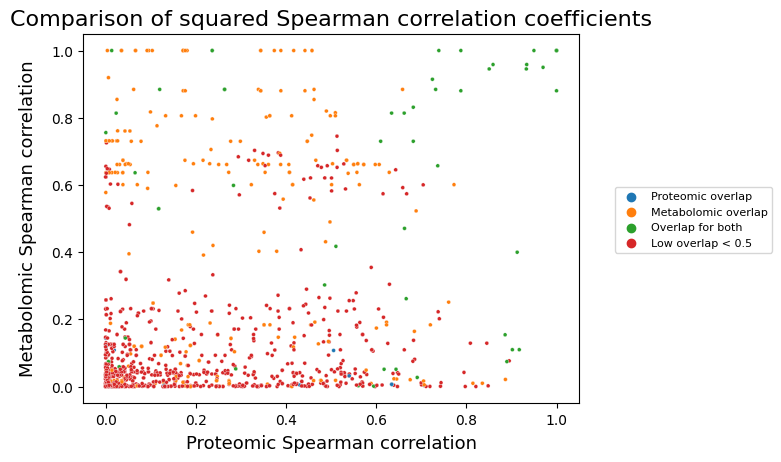

In [15]:
fig, ax = plt.subplots()  #i do this because ax.legend is needed to remove the legend title

sns.scatterplot(
    data=omics_corr_df,
    x="Proteomic_corr", 
    y="Metabolomic_corr",
    hue="Overlap",
    hue_order = ['Proteomic overlap','Metabolomic overlap','Overlap for both','Low overlap < 0.5'],
    s=8)       #color='#FFD580',s=10
        
plt.title('Comparison of squared Spearman correlation coefficients',fontsize=16)
plt.xlabel("Proteomic Spearman correlation",fontsize=13, labelpad=5)
plt.ylabel("Metabolomic Spearman correlation",fontsize=13, labelpad=10) 

legend = ax.legend(bbox_to_anchor=(1.4,0.6), prop={'size': 8})
#plt.legend(framealpha=1, frameon = 'True', title="p-value",title_fontsize='large', prop={'size': 10}, bbox_to_anchor=(1.35, 0.7)) 

#plt.savefig('Figures/COMMONCCASES_omics_spearman_corr_oc.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

Comparing the overlap coefficient of the two omics:

In [ ]:
proteomic_oc = []
metabolomic_oc = []

find_val(proteomic_oc,metabolomic_oc,'Overlap_coef')

sns.scatterplot(x=proteomic_oc, y=metabolomic_oc,s=8)       #color='#FFD580',s=10
                
plt.title('Comparison of overlap coefficients',fontsize=16)
plt.xlabel("Proteomic overlap coefficient",fontsize=13, labelpad=5)
plt.ylabel("Metabolomic overlap coefficient",fontsize=13, labelpad=10) 

#plt.savefig('Figures/omics_overlap_coef.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

Since there are fewer points observed than expected, it is possible that many of the points are overlapping.
Therefore we should plot a regression line to check if there is a trend, and also to reduce the point transparency.

In [ ]:
#Obtain regression values
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

plot = sns.regplot(x=proteomic_oc, y=metabolomic_oc,scatter_kws={'s':5,'alpha':0.3},line_kws={'linewidth':2})  #,color='red,x_jitter=0.005,y_jitter=0.005
plt.title('Comparison of overlap coefficients',fontsize=16)
plt.xlabel("Proteomic overlap coefficient",fontsize=13, labelpad=5)
plt.ylabel("Metabolomic overlap coefficient",fontsize=13, labelpad=10) 

res = scipy.stats.linregress(x=proteomic_oc, y=metabolomic_oc)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.rcParams['font.size'] = 14  #change font size of the r-squared label
plt.text(0.5, 0.25, f"R-squared: {res.rvalue**2:.6f}")

#plt.savefig('Figures/omics_overlap_coef.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')


In [ ]:
print(np.median(proteomic_oc))
print(np.median(metabolomic_oc))

print(np.mean(proteomic_oc))
print(np.mean(metabolomic_oc))

print(sum(i == 0  for i in metabolomic_oc))
print(sum(i == 0  for i in proteomic_oc))

### Method 1 - Combine both pre-filtered networks together and combine the p-values

The networks were constructed in NetworkX but the edges have not been filtered out

In [6]:
#https://networkx.org/documentation/stable/reference/algorithms/operators.html
# compose = "Compose graph G with H by combining nodes and edges into a single graph."

#If networks have the same edge, keep the attributes of the last network
#I.e. Right now the edges have the metabolite edge attributes
G = nx.compose(proteomic_copy,metabolomic_copy)

#len(proteomic_copy.edges & metabolomic_copy.edges)
#nx.draw(G, with_labels = True)

print(G.edges['R-HSA-112315', 'R-HSA-1483257'])

{'Squared_corr': 0.10550823820072297, 'Spearman_pval': 1.0, 'Overlap_coef': 0.2}


Combining the p-values

In [7]:
#Using Fisher's method to combine the p-values: Example code
p_values_list= [5.202380530055585e-20, 7.5913348658720385e-25]
print(scipy.stats.combine_pvalues(p_values_list, method='fisher'))  #output gives two numbers; first is the test statistic, second is the p-value (what we want)

#Using harmonic mean p-value method to combine the p-values: Example code
scipy.stats.hmean(p_values_list)


SignificanceResult(statistic=199.8804108441174, pvalue=3.986432815011612e-42)


1.5182448188841517e-24

In [8]:
edge_dict = {e: ([   proteomic_copy.edges[e]['Spearman_pval']  ,  metabolomic_copy.edges[e]['Spearman_pval']  ]) for e in proteomic_copy.edges & metabolomic_copy.edges}
print(edge_dict)

combined_pvals_fisher = []
combined_pvals_hmean = []

for k,v in edge_dict.items():

    #Fisher's method
    test_stat,pval = scipy.stats.combine_pvalues(v, method='fisher',weights=None)
    combined_pvals_fisher.append(pval)

    #Harmonic mean p-value
    combined_pvals_hmean.append(scipy.stats.hmean(v))

    

print(combined_pvals_fisher)
print(combined_pvals_hmean)

print(sum(i < 0.005 for i in combined_pvals_fisher))
print(sum(i < 0.005  for i in combined_pvals_hmean))

{('R-HSA-211945', 'R-HSA-2980736'): [1.0, 1.0], ('R-HSA-2142753', 'R-HSA-388396'): [1.1663020494655096e-09, 0.08320925689051213], ('R-HSA-500792', 'R-HSA-597592'): [5.376843811528297e-28, 0.16796105148646315], ('R-HSA-2408522', 'R-HSA-8978868'): [1.0, 0.08151356879116325], ('R-HSA-1483257', 'R-HSA-9707564'): [3.5056151589135074e-11, 1.0], ('R-HSA-1592230', 'R-HSA-9711123'): [1.0, 0.0], ('R-HSA-2408522', 'R-HSA-5683826'): [0.05191373203670732, 1.0], ('R-HSA-5663205', 'R-HSA-8956321'): [1.0, 0.0032502699700866114], ('R-HSA-112315', 'R-HSA-8978868'): [1.1663020494655096e-09, 2.4839794049856254e-30], ('R-HSA-373076', 'R-HSA-8978868'): [4.477560289264479e-17, 1.677982523700846e-27], ('R-HSA-2262752', 'R-HSA-5663205'): [8.985059493142162e-19, 1.0], ('R-HSA-418555', 'R-HSA-9711123'): [1.0, 1.0], ('R-HSA-2142753', 'R-HSA-71291'): [1.0, 9.243097799681735e-05], ('R-HSA-372790', 'R-HSA-71406'): [0.00238591716151218, 1.0], ('R-HSA-1483257', 'R-HSA-196071'): [1.0, 1.0], ('R-HSA-71406', 'R-HSA-97563

c:\Users\jenna\anaconda3\envs\Imperial_Project2\lib\site-packages\scipy\stats\_stats_py.py:8959: RuntimeWarning: divide by zero encountered in log
  statistic = -2 * np.sum(np.log(pvalues))


[1.0, 2.3345486430589752e-09, 5.9220176450674696e-27, 0.28586692698288246, 8.790003991880697e-10, 0.0, 0.20548347731121971, 0.021871122593068507, 2.599747386393458e-37, 7.535587848088092e-42, 3.823462109678338e-17, 1.0, 0.0009510268040315555, 0.016792494583788432, 1.0, 1.1497425308756512e-10, 1.0, 7.255796653251507e-92, 9.582536945497067e-31, 1.0, 8.308603460782694e-07, 4.3492435172098996e-48, 4.838919447664278e-72, 1.0, 1.0, 9.617016225549715e-26, 1.6278085244357286e-45, 0.7875153453904593, 1.0, 1.0, 4.840708497333703e-17, 1.1497425308756512e-10, 0.0, 1.0, 5.477616568311237e-07, 8.415725194835134e-42, 6.4015267150334134e-37, 0.9759010490588835, 0.014176602334843712, 1.0, 1.4325874522896576e-23, 1.0, 0.0, 0.001594147802488971, 1.0, 1.4905308128658893e-18, 2.703849399959019e-19, 1.0, 1.0, 1.1272076395192801e-54, 0.032030168470742394, 1.0, 1.0, 1.0, 2.0215843634504265e-33, 1.0, 1.0, 0.39352450328371213, 0.0, 0.7875153453904593, 0.07974635110887353, 1.0, 1.0, 1.812536577963393e-14, 1.0622

In [9]:
#It's not possible to take the log10 of zero, we ignore the divide by zero warning
#Transform the p-values on a -log10 scale

np.seterr(divide = 'ignore')    

log_combined_pvals_fisher = -np.log10(combined_pvals_fisher)
log_combined_pvals_hmean = -np.log10(combined_pvals_hmean)

np.seterr(divide = 'warn') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [10]:
len(combined_pvals_fisher)
len(combined_pvals_hmean)

1081

In [12]:

keylist = []
vallist = []
for i in range(1081):
    fisher = combined_pvals_fisher[i]
    hmean = combined_pvals_hmean[i]

    if fisher < 0.005 and hmean >= 0.005:
        vallist.append(hmean)
    if hmean < 0.005 and fisher >=0.005:
        keylist.append(fisher)
  

print(sum(i < 0.005 for i in combined_pvals_fisher))
print(sum(i < 0.005 for i in combined_pvals_hmean))

print(len(keylist))
print(len(vallist))

580
585
10
5


In [ ]:
sns.scatterplot(x=log_combined_pvals_fisher, y=log_combined_pvals_hmean,s=8)       #color='#FFD580',s=10
                
plt.title('Comparison of p-value combining methods',fontsize=16)
plt.xlabel("Fisher's method p-values (-log10)",fontsize=13, labelpad=5)
plt.ylabel("Harmonic mean p-values (-log10)",fontsize=13, labelpad=10) 

plt.xlim(0,)   #-log_10(0.005) = 2.301...
plt.ylim(0,)


#Changing the axis limits to focus on the boundary 
#plt.xlim(0,-np.log10(0.005)+1.5)   #-log_10(0.005) = 2.301...
#plt.ylim(0,-np.log10(0.005)+1.5)

#plt.axvline(x=-np.log10(0.005), color='r', linewidth=0.1, linestyle='-')
#plt.axhline(y=-np.log10(0.005), color='r', linewidth=0.1, linestyle='-')

#plt.savefig('Figures/p_val_combining_methods.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [13]:
#Using harmonic mean p-value method 
edge_data = {e:combined_pvals_hmean[index] for index,e in enumerate(proteomic_copy.edges & metabolomic_copy.edges) } # for e in proteomic_copy.edges & metabolomic_copy.edges
nx.set_edge_attributes(G, edge_data, 'Spearman_pval')

In [14]:
#Get the average for the Spearman correlation coefficients and the overlap coefficient
#HOWEVER it is not recommended to take the average of the p-values, thus we combine them using one of two methods: Fisher's method OR harmonic p-value

def add_attributes(attribute_name):
    edge_data = {e: ((proteomic_copy.edges[e][attribute_name] + metabolomic_copy.edges[e][attribute_name])/2) for e in proteomic_copy.edges & metabolomic_copy.edges}
    nx.set_edge_attributes(G, edge_data, attribute_name)


#Print all edge information (data=True means to display edge attribute data as well)
#print(G.edges(data=True))             

add_attributes("Squared_corr")
add_attributes("Overlap_coef")


print(proteomic_copy.edges['R-HSA-112315', 'R-HSA-1483257'])
print(metabolomic_copy.edges['R-HSA-112315', 'R-HSA-1483257'])
print(G.edges['R-HSA-112315', 'R-HSA-1483257'])

#print(proteomic_copy.edges['R-HSA-2262752', 'R-HSA-8978868'])
#print(metabolomic_copy.edges['R-HSA-2262752', 'R-HSA-8978868'])
#print(G.edges['R-HSA-2262752', 'R-HSA-8978868'])


{'Squared_corr': 0.5931376084924628, 'Spearman_pval': 3.795657319593375e-21, 'Overlap_coef': 0.0}
{'Squared_corr': 0.10550823820072297, 'Spearman_pval': 1.0, 'Overlap_coef': 0.2}
{'Squared_corr': 0.3493229233465929, 'Spearman_pval': 7.59131463918675e-21, 'Overlap_coef': 0.1}


In [16]:
#Filter out edges based on Spearman p-value and Overlap Coefficient
edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if (e['Spearman_pval'] >= 0.005 or e['Overlap_coef'] >= 0.5)]
len(edges_to_remove)
edges_to_remove

[('R-HSA-112315', 'R-HSA-15869'),
 ('R-HSA-112315', 'R-HSA-196071'),
 ('R-HSA-112315', 'R-HSA-196849'),
 ('R-HSA-112315', 'R-HSA-211945'),
 ('R-HSA-112315', 'R-HSA-5668914'),
 ('R-HSA-112315', 'R-HSA-5683826'),
 ('R-HSA-112315', 'R-HSA-73884'),
 ('R-HSA-112315', 'R-HSA-8956319'),
 ('R-HSA-112315', 'R-HSA-8956321'),
 ('R-HSA-1428517', 'R-HSA-15869'),
 ('R-HSA-1428517', 'R-HSA-196071'),
 ('R-HSA-1428517', 'R-HSA-196849'),
 ('R-HSA-1428517', 'R-HSA-196854'),
 ('R-HSA-1428517', 'R-HSA-211945'),
 ('R-HSA-1428517', 'R-HSA-2142753'),
 ('R-HSA-1428517', 'R-HSA-2408508'),
 ('R-HSA-1428517', 'R-HSA-2408522'),
 ('R-HSA-1428517', 'R-HSA-2980736'),
 ('R-HSA-1428517', 'R-HSA-373076'),
 ('R-HSA-1428517', 'R-HSA-381340'),
 ('R-HSA-1428517', 'R-HSA-388396'),
 ('R-HSA-1428517', 'R-HSA-418555'),
 ('R-HSA-1428517', 'R-HSA-418594'),
 ('R-HSA-1428517', 'R-HSA-500792'),
 ('R-HSA-1428517', 'R-HSA-5668914'),
 ('R-HSA-1428517', 'R-HSA-5683826'),
 ('R-HSA-1428517', 'R-HSA-71387'),
 ('R-HSA-1428517', 'R-HSA-71406

In [ ]:
G.remove_edges_from(edges_to_remove)
print(G.number_of_nodes())
print(G.number_of_edges())
G.nodes()

In [ ]:
nx.draw(G, with_labels = True)

### Method 2 - Filter out edges separately by Spearman p-value then average out the Spearman correlation and Overlap Coefficient

In [ ]:
#Filter out edges based on Spearman p-value and Overlap Coefficient
edges_to_remove_proteomic = [(u,v) for u,v,e in proteomic_copy.edges(data=True) if (e['Spearman_pval'] >= 0.05 )]
print(len(edges_to_remove_proteomic))

edges_to_remove_metabolomic = [(u,v) for u,v,e in metabolomic_copy.edges(data=True) if (e['Spearman_pval'] >= 0.05 )]
print(len(edges_to_remove_metabolomic))

edges_to_remove = set( edges_to_remove_proteomic + edges_to_remove_metabolomic )
print(len(edges_to_remove))

G = nx.compose(proteomic_copy,metabolomic_copy)
print(G.edges['R-HSA-112315', 'R-HSA-1483257'])

def add_attributes(attribute_name):
    edge_data = {e: ((proteomic_copy.edges[e][attribute_name] + metabolomic_copy.edges[e][attribute_name])/2) for e in proteomic_copy.edges & metabolomic_copy.edges}
    nx.set_edge_attributes(G, edge_data, attribute_name)


#Print all edge information (data=True means to display edge attribute data as well)
#print(G.edges(data=True))             

add_attributes("Squared_corr")
add_attributes("Overlap_coef")


print(proteomic_copy.edges['R-HSA-112315', 'R-HSA-1483257'])
print(metabolomic_copy.edges['R-HSA-112315', 'R-HSA-1483257'])
print(G.edges['R-HSA-112315', 'R-HSA-1483257'])

G.remove_edges_from(edges_to_remove)
print(G.number_of_nodes())
print(G.number_of_edges())
G.nodes()

#Filter out edges based on Spearman p-value and Overlap Coefficient
edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if e['Overlap_coef'] >= 0.5]
len(edges_to_remove)

G.remove_edges_from(edges_to_remove)
print(G.number_of_nodes())
print(G.number_of_edges())
G.nodes()

### Setting node attributes (Next stage after running either Method 1 or Method 2)

In [ ]:
#Nodes with no edges
nodes_to_remove = list(nx.isolates(G))
nodes_to_remove

#['R-HSA-196071', 'R-HSA-2151201']

In [ ]:
#nodes_to_remove=['R-HSA-196071']
G.remove_nodes_from(nodes_to_remove)

In [ ]:
#IF YOU DON'T REMOVE THE EDGES, DON'T RUN THIS CODE

#Add the betweenness centrality as a node attribute
betweenness= nx.betweenness_centrality(G, normalized=True) #output as dictionary
#display(betweenness)
nx.set_node_attributes(G, betweenness, "betweenness")

#Add the betweenness centrality as a node attribute
degree= nx.degree_centrality(G) #output as dictionary
#display(degree)
nx.set_node_attributes(G, degree, "degrees")


#Check
#G.nodes['R-HSA-112315']#["betweenness"]
#G.nodes['R-HSA-196071']#["betweenness"]

In [ ]:
#Using Cecilia's code

#Creating graph
hierarchy = pd.read_csv('Data/ReactomePathwaysRelation.txt', sep='\t', header=None)

#From the pathways, subset to Homo sapiens only
hierarchy_hsa = hierarchy[hierarchy[0].str.contains('HSA')]

#Return unique values in the first column that is not in the second column as a numpy array
#These values are not child pathways in any instances
hierarchy_hsa_parents = np.setdiff1d(hierarchy_hsa[0], hierarchy_hsa[1])

#Add the unique values not in the second column as a second attached dataset to the bottom of the original data
#The first column represents the parent column, the second column is the child column
hierarchy_hsa_all = pd.concat([hierarchy_hsa, pd.DataFrame([hierarchy_hsa_parents, hierarchy_hsa_parents], index=[0, 1]).T])

#DiGraph is a directed graph
H = nx.from_pandas_edgelist(hierarchy_hsa, source=0, target=1, create_using=nx.DiGraph())


In [ ]:
#Find the root pathway 

def find_root(H,child):
    #Find parent from child 
    parent = list(H.predecessors(child))

    #Keep the loop going until the highest level is reached
    if len(parent) == 0:
        return child
    else:  
        return find_root(H, parent[0])

hierarchy_hsa_all['Root'] = [find_root(H, i) for i in hierarchy_hsa_all[1]]

hierarchy_hsa_all.columns = ['Parent', 'Child', 'Root']

#There are 83 instances of duplicates, however all the child duplicates have the same root (even though different parents) after checking



#Convert pathway ID to name
root_path = pd.read_excel('Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}



#Assign name to each node
root_pathways = {}
for pathway in list(H.nodes):
    index = hierarchy_hsa_all.Child[hierarchy_hsa_all.Child == pathway].index.tolist()[0]
    root_pathway  = hierarchy_hsa_all.Root[index]
    label = root_pathway_dict[root_pathway]
    root_pathways[pathway] = label




In [ ]:
#shows all the root pathways in Reactome
set(hierarchy_hsa_all['Root'] )
#shows all the root pathways present in the original dataset
set(root_pathways.values())

nx.set_node_attributes(G, root_pathways, "root_pathway")

print(G.number_of_nodes()) 

In [ ]:

louvain_clusters = nx.community.louvain_communities(G, weight='Squared_corr',seed=100,resolution=1.5)
print(len(louvain_clusters))

louvain_dict = {}
for index,grouping in enumerate(louvain_clusters):
    for pathway in grouping:
        louvain_dict[pathway] = index+1

nx.set_node_attributes(G, louvain_dict, "louvain")
    

Note that for the separate omics analyses I use different pathway files for the separate metabolomics and proteomics data (since different compounds form the pathways), however since we take the intersection of the compounds for data integration it is fine to use the metabolomics pathways file to load in the pathway names.

In [ ]:
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")

pathway_name_dict = {reactome_pathways.index[i]:reactome_pathways["Pathway_name"][i] for i in range(0,len(reactome_pathways))}
pathway_name_dict['R-HSA-1483257']
pathway_name_dict = {k:pathway_name_dict[k] for k in list(G.nodes)}
#G = nx.relabel_nodes(G, pathway_name_dict)
nx.set_node_attributes(G, pathway_name_dict, "pathway_name")
G.nodes

In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())
G.edges['R-HSA-112315', 'R-HSA-1483257']#["Spearman_pval"]
G.nodes['R-HSA-112315']#["betweenness"]

In [ ]:
#nx.write_gml(G,'Cytoscape/integrated_commoncases_harmonic.gml')
#nx.write_gml(G,'Cytoscape/integrated_all_harmonic.gml')
#nx.write_gml(G,'Cytoscape/integrated_mildcases_harmonic.gml')
#nx.write_gml(G,'Cytoscape/integrated_severecases_harmonic.gml')